# Entrenamiento y resultado de modelo optimo

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Usamos las variables seleccionadas para el entrenamiento

In [13]:
df_selected_clean = pd.read_csv('../Data/df_selected_clean.csv')
print(df_selected_clean.head())

    price  base_price  available_quantity  condition_binary
0    80.0        80.0                   1                 1
1  2650.0      2650.0                   1                 0
2    60.0        60.0                   1                 0
3   580.0       580.0                   1                 1
4    30.0        30.0                   1                 0


### Definir las características (X) y la variable objetivo (y)

In [14]:
X = df_selected_clean.drop(columns=['condition_binary'])  # Características
y = df_selected_clean['condition_binary']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Primer Modelo

In [27]:
from sklearn.linear_model import LogisticRegression

# Inicializar y entrenar el modelo de regresión logística
logreg_model = LogisticRegression(class_weight='balanced')
logreg_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_logreg = logreg_model.predict(X_test)


In [28]:
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Mostrar el reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.65315
Matriz de confusión:
[[9158  125]
 [6812 3905]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.57      0.99      0.73      9283
           1       0.97      0.36      0.53     10717

    accuracy                           0.65     20000
   macro avg       0.77      0.68      0.63     20000
weighted avg       0.79      0.65      0.62     20000



## Segundo Modelo

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
print("Precisión del modelo Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_rf))


Precisión del modelo Random Forest: 0.78625
Matriz de confusión:
[[8283 1000]
 [3275 7442]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.72      0.89      0.79      9283
           1       0.88      0.69      0.78     10717

    accuracy                           0.79     20000
   macro avg       0.80      0.79      0.79     20000
weighted avg       0.81      0.79      0.79     20000



In [18]:
# Importancia de las características
feature_importances = rf_model.feature_importances_
for name, importance in zip(X_train.columns, feature_importances):
    print(f"{name}: {importance}")


price: 0.22438410471784168
base_price: 0.22655385788026983
available_quantity: 0.5490620374018885


## Tercer Modelo

In [22]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Definir los hiperparámetros a ajustar para XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}


grid_search_xgb = GridSearchCV(XGBClassifier(eval_metric='mlogloss', use_label_encoder=False), param_grid_xgb, cv=3, n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)


print("Mejores hiperparámetros para XGBoost:", grid_search_xgb.best_params_)

best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluar el rendimiento del modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_xgb = accuracy_score(y_test, y_pred_best_xgb)
print("Precisión del modelo XGBoost ajustado:", accuracy_xgb)
print("Matriz de confusión XGBoost ajustado:")
print(confusion_matrix(y_test, y_pred_best_xgb))
print("\nReporte de clasificación XGBoost ajustado:")
print(classification_report(y_test, y_pred_best_xgb))



Fitting 3 folds for each of 54 candidates, totalling 162 fits


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:33:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros para XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Precisión del modelo XGBoost ajustado: 0.76275
Matriz de confusión XGBoost ajustado:
[[7634 1649]
 [3096 7621]]

Reporte de clasificación XGBoost ajustado:
              precision    recall  f1-score   support

           0       0.71      0.82      0.76      9283
           1       0.82      0.71      0.76     10717

    accuracy                           0.76     20000
   macro avg       0.77      0.77      0.76     20000
weighted avg       0.77      0.76      0.76     20000



## Cuarto Modelo

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
# Entrenar y evaluar un modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluar el rendimiento del modelo Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("\nPrecisión del modelo Gradient Boosting:", accuracy_gb)
print("Matriz de confusión (Gradient Boosting):")
print(confusion_matrix(y_test, y_pred_gb))
print("\nReporte de clasificación (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))


Precisión del modelo Gradient Boosting: 0.7623
Matriz de confusión (Gradient Boosting):
[[7887 1396]
 [3358 7359]]

Reporte de clasificación (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.70      0.85      0.77      9283
           1       0.84      0.69      0.76     10717

    accuracy                           0.76     20000
   macro avg       0.77      0.77      0.76     20000
weighted avg       0.78      0.76      0.76     20000



# Graficas comparativas de modelos

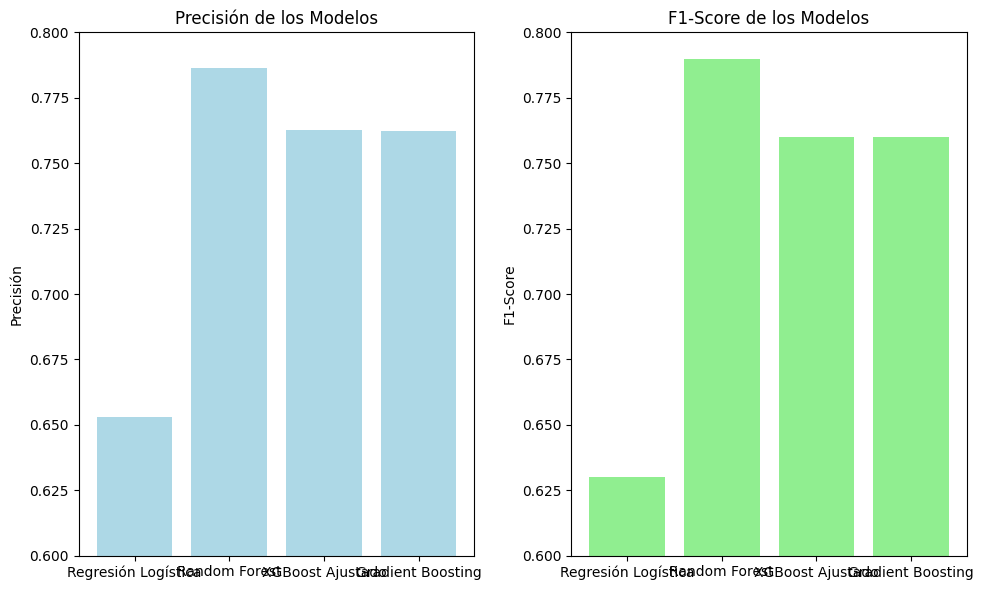

In [25]:
import matplotlib.pyplot as plt

model_names = ['Regresión Logística', 'Random Forest', 'XGBoost Ajustado', 'Gradient Boosting']
accuracies = [0.65315, 0.78625, 0.76275, 0.7623]
f1_scores = [0.63, 0.79, 0.76, 0.76]
plt.figure(figsize=(10, 6))

# Graficar la precisión de los modelos
plt.subplot(1, 2, 1)
plt.bar(model_names, accuracies, color='lightblue')
plt.title('Precisión de los Modelos')
plt.ylabel('Precisión')
plt.ylim([0.6, 0.8])

# Graficar el F1-score de los modelos
plt.subplot(1, 2, 2)
plt.bar(model_names, f1_scores, color='lightgreen')
plt.title('F1-Score de los Modelos')
plt.ylabel('F1-Score')
plt.ylim([0.6, 0.8])

plt.tight_layout()
plt.show()


### Análisis de Precisión y F1-Score de los Modelos

- **Random Forest** muestra el mejor rendimiento, con una precisión y F1-Score cercanos a **0.79**, siendo el modelo más equilibrado en este conjunto de datos.
- **XGBoost Ajustado** y **Gradient Boosting** tienen un rendimiento similar, ambos con una precisión y F1-Score alrededor de **0.76**.
- **Regresión Logística** tiene el peor desempeño, con una precisión y F1-Score aproximadamente de **0.65** y **0.63**, respectivamente, mostrando que no es tan efectivo como los otros modelos en este problema.

En resumen, **Random Forest** es el modelo más robusto, seguido de los modelos de **Boosting**, mientras que **Regresión Logística** es menos adecuado para este escenario.


In [29]:
import pandas as pd

y_pred_logreg = logreg_model.predict(X_test)  # Regresión logística
y_pred_rf = rf_model.predict(X_test)  # Random Forest
y_pred_xgb = xgb_model.predict(X_test)  # XGBoost ajustado
y_pred_gb = gb_model.predict(X_test)  # Gradient Boosting


comparison_df = pd.DataFrame({
    'Real': y_test,
    'Regresión Logística': y_pred_logreg,
    'Random Forest': y_pred_rf,
    'XGBoost Ajustado': y_pred_xgb,
    'Gradient Boosting': y_pred_gb
})

# Mostrar las primeras filas para analizar las comparaciones
print(comparison_df.head(20))


       Real  Regresión Logística  Random Forest  XGBoost Ajustado  \
75721     1                    0              1                 0   
80184     0                    0              0                 0   
19864     1                    0              1                 1   
76699     0                    0              0                 0   
92991     1                    0              1                 1   
76434     1                    0              0                 0   
84004     1                    1              1                 1   
80917     1                    0              0                 0   
60767     1                    0              1                 1   
50074     1                    1              1                 1   
27701     0                    0              0                 0   
42141     1                    1              1                 1   
45080     0                    0              0                 0   
16638     1                    0  

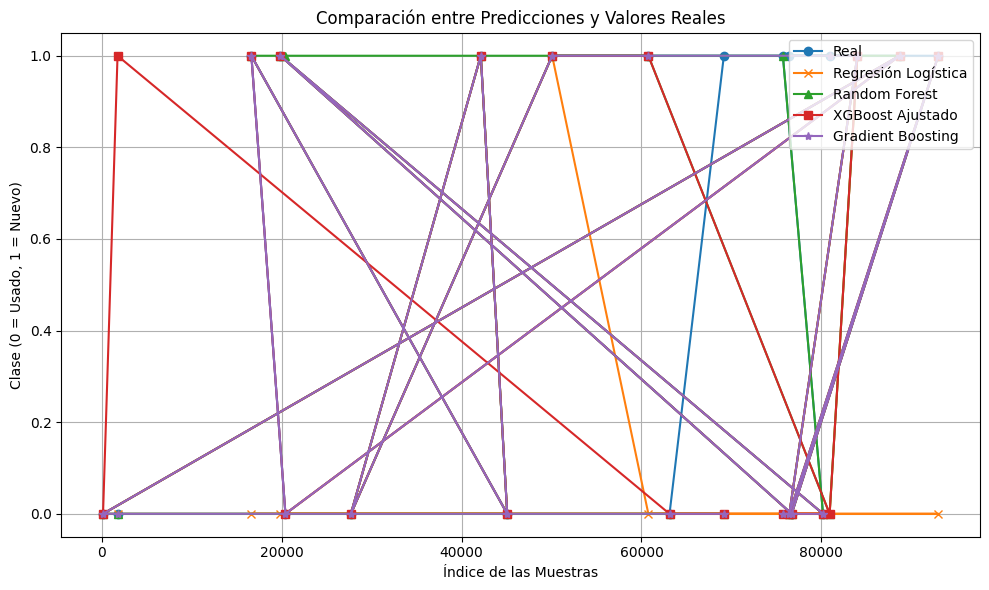

In [30]:
import matplotlib.pyplot as plt

subset_comparison_df = comparison_df.head(20)

plt.figure(figsize=(10, 6))


plt.plot(subset_comparison_df.index, subset_comparison_df['Real'], label='Real', marker='o')
plt.plot(subset_comparison_df.index, subset_comparison_df['Regresión Logística'], label='Regresión Logística', marker='x')
plt.plot(subset_comparison_df.index, subset_comparison_df['Random Forest'], label='Random Forest', marker='^')
plt.plot(subset_comparison_df.index, subset_comparison_df['XGBoost Ajustado'], label='XGBoost Ajustado', marker='s')
plt.plot(subset_comparison_df.index, subset_comparison_df['Gradient Boosting'], label='Gradient Boosting', marker='*')

plt.title('Comparación entre Predicciones y Valores Reales')
plt.xlabel('Índice de las Muestras')
plt.ylabel('Clase (0 = Usado, 1 = Nuevo)')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()


### Análisis de Comparación entre Predicciones y Valores Reales

Este gráfico compara las predicciones de los diferentes modelos (**Regresión Logística**, **Random Forest**, **XGBoost Ajustado**, y **Gradient Boosting**) con los valores reales para la clasificación de artículos en **"Usado" (0)** o **"Nuevo" (1)**.

- **Valores Reales**: Representados con la línea azul, muestran la verdadera clase de los artículos.
- **Regresión Logística**: La línea roja tiene varios errores, lo que sugiere que el modelo tiene dificultades para capturar la verdadera clase.
- **Random Forest**: La línea verde sigue más de cerca los valores reales, indicando un mejor rendimiento.
- **XGBoost Ajustado**: Representado en naranja, tiene un rendimiento razonablemente bueno pero muestra algunos errores.
- **Gradient Boosting**: La línea morada sigue en muchos casos los valores reales, aunque muestra algunos errores de predicción.

En resumen, **Random Forest** parece ser el modelo con mayor precisión en esta comparación visual, mientras que **Regresión Logística** muestra el mayor número de errores. Los modelos de **Boosting** también muestran un buen rendimiento con menos errores en comparación con la Regresión Logística.


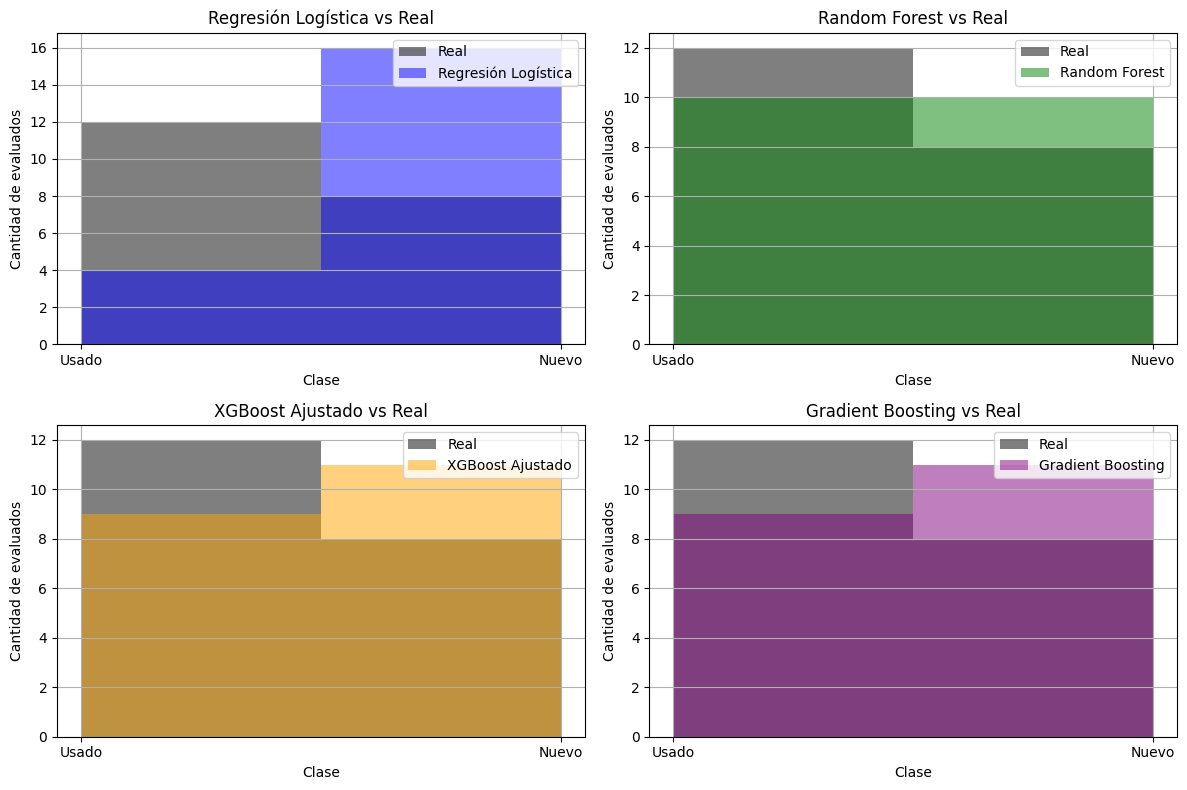

In [33]:
import matplotlib.pyplot as plt

subset_comparison_df = comparison_df.head(20)
x_labels = ['Usado', 'Nuevo']

plt.figure(figsize=(12, 8))

# Graficar los valores reales y predichos por Regresión Logística
plt.subplot(2, 2, 1)
plt.hist(subset_comparison_df['Real'].replace({0: 'Usado', 1: 'Nuevo'}), bins=2, alpha=0.5, label='Real', color='black')
plt.hist(subset_comparison_df['Regresión Logística'].replace({0: 'Usado', 1: 'Nuevo'}), bins=2, alpha=0.5, label='Regresión Logística', color='blue')
plt.title('Regresión Logística vs Real')
plt.xlabel('Clase')
plt.ylabel('Cantidad de evaluados')
plt.xticks([0, 1], x_labels)
plt.legend(loc='upper right')
plt.grid(True)

# Graficar los valores reales y predichos por Random Forest
plt.subplot(2, 2, 2)
plt.hist(subset_comparison_df['Real'].replace({0: 'Usado', 1: 'Nuevo'}), bins=2, alpha=0.5, label='Real', color='black')
plt.hist(subset_comparison_df['Random Forest'].replace({0: 'Usado', 1: 'Nuevo'}), bins=2, alpha=0.5, label='Random Forest', color='green')
plt.title('Random Forest vs Real')
plt.xlabel('Clase')
plt.ylabel('Cantidad de evaluados')
plt.xticks([0, 1], x_labels)
plt.legend(loc='upper right')
plt.grid(True)

# Graficar los valores reales y predichos por XGBoost Ajustado
plt.subplot(2, 2, 3)
plt.hist(subset_comparison_df['Real'].replace({0: 'Usado', 1: 'Nuevo'}), bins=2, alpha=0.5, label='Real', color='black')
plt.hist(subset_comparison_df['XGBoost Ajustado'].replace({0: 'Usado', 1: 'Nuevo'}), bins=2, alpha=0.5, label='XGBoost Ajustado', color='orange')
plt.title('XGBoost Ajustado vs Real')
plt.xlabel('Clase')
plt.ylabel('Cantidad de evaluados')
plt.xticks([0, 1], x_labels)
plt.legend(loc='upper right')
plt.grid(True)

# Graficar los valores reales y predichos por Gradient Boosting
plt.subplot(2, 2, 4)
plt.hist(subset_comparison_df['Real'].replace({0: 'Usado', 1: 'Nuevo'}), bins=2, alpha=0.5, label='Real', color='black')
plt.hist(subset_comparison_df['Gradient Boosting'].replace({0: 'Usado', 1: 'Nuevo'}), bins=2, alpha=0.5, label='Gradient Boosting', color='purple')
plt.title('Gradient Boosting vs Real')
plt.xlabel('Clase')
plt.ylabel('Cantidad de evaluados')
plt.xticks([0, 1], x_labels)
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()


### Análisis Visual de la Comparación entre Predicciones y Valores Reales

Este conjunto de gráficos visualiza la capacidad de cada modelo para predecir las clases "Usado" y "Nuevo" comparado con los valores reales. La clave aquí es cómo los modelos se alinean (o no) con los valores reales y cuán consistente es cada modelo en capturar las clases correctas.

#### 1. **Regresión Logística vs Real**:
- **Regresión Logística** muestra dificultades para manejar la clase "Usado". La gran diferencia entre los valores predichos y los reales en esta clase resalta la limitación del modelo en capturar correctamente los artículos usados. Sin embargo, tiene un mejor rendimiento en la clase "Nuevo", aunque sigue siendo impreciso.

#### 2. **Random Forest vs Real**:
- **Random Forest** es el modelo más equilibrado en cuanto a predicciones correctas para ambas clases.


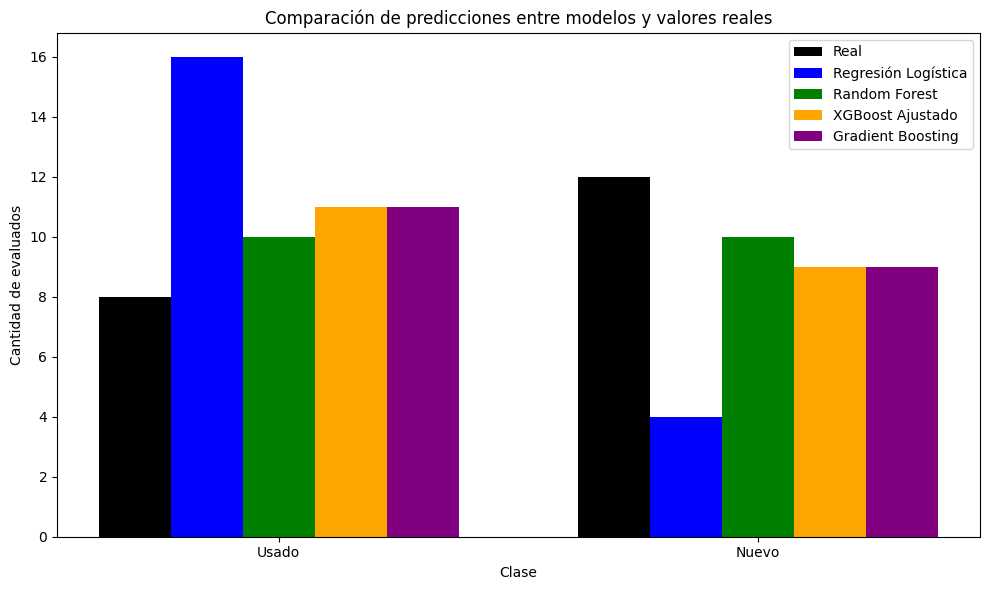

In [34]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['Usado', 'Nuevo']
real_counts = subset_comparison_df['Real'].value_counts().sort_index()
logreg_counts = subset_comparison_df['Regresión Logística'].value_counts().sort_index()
rf_counts = subset_comparison_df['Random Forest'].value_counts().sort_index()
xgb_counts = subset_comparison_df['XGBoost Ajustado'].value_counts().sort_index()
gb_counts = subset_comparison_df['Gradient Boosting'].value_counts().sort_index()

x = np.arange(len(labels))  
width = 0.15 
fig, ax = plt.subplots(figsize=(10, 6))


rects1 = ax.bar(x - 2*width, real_counts, width, label='Real', color='black')
rects2 = ax.bar(x - width, logreg_counts, width, label='Regresión Logística', color='blue')
rects3 = ax.bar(x, rf_counts, width, label='Random Forest', color='green')
rects4 = ax.bar(x + width, xgb_counts, width, label='XGBoost Ajustado', color='orange')
rects5 = ax.bar(x + 2*width, gb_counts, width, label='Gradient Boosting', color='purple')


ax.set_xlabel('Clase')
ax.set_ylabel('Cantidad de evaluados')
ax.set_title('Comparación de predicciones entre modelos y valores reales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


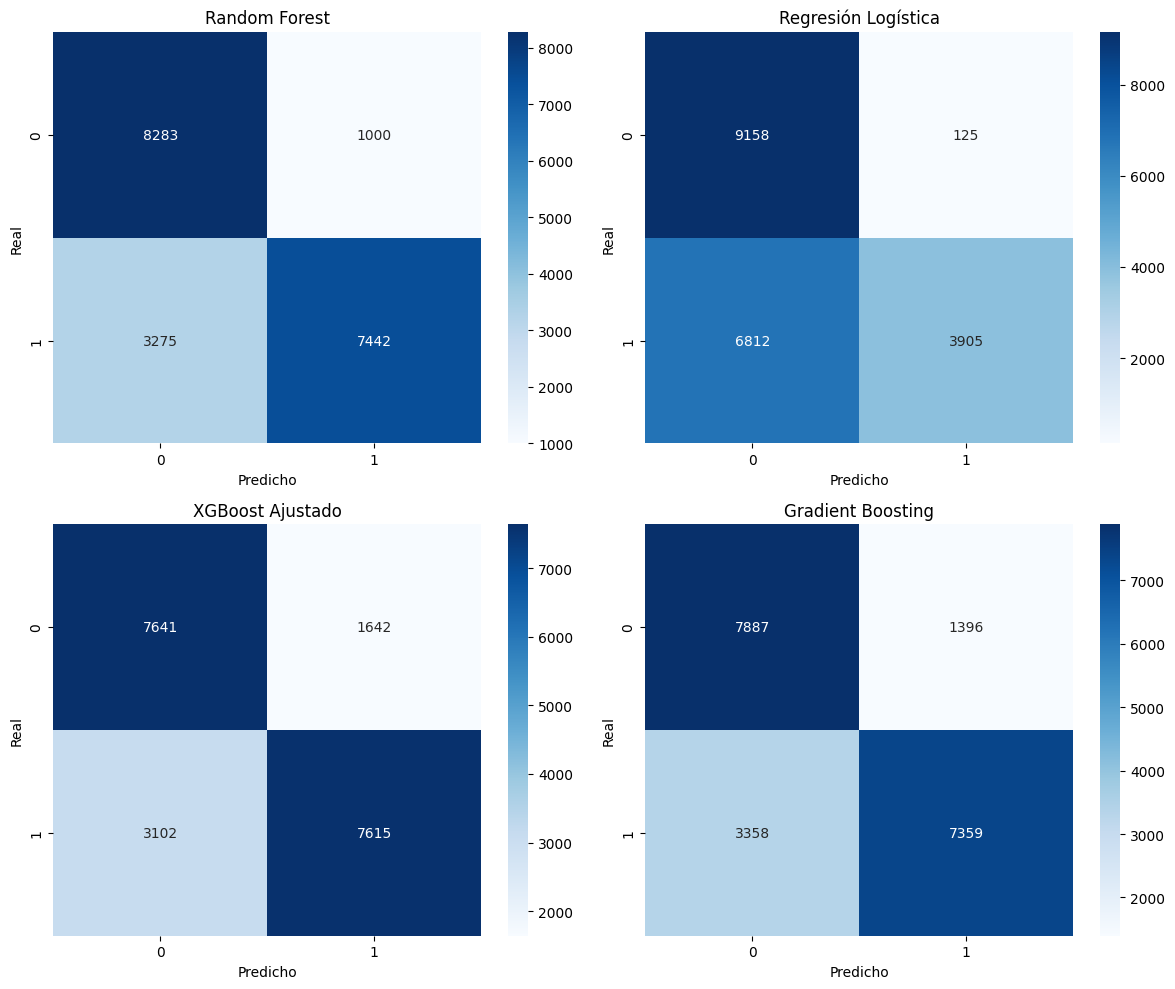

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_rf = rf_model.predict(X_test)  # Predicciones de Random Forest
y_pred_logreg = logreg_model.predict(X_test)  # Predicciones de Regresión Logística
y_pred_xgb = xgb_model.predict(X_test)  # Predicciones de XGBoost ajustado
y_pred_gb = gb_model.predict(X_test)  # Predicciones de Gradient Boosting


cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_gb = confusion_matrix(y_test, y_pred_gb)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Matriz de confusión para Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Random Forest')
axes[0, 0].set_xlabel('Predicho')
axes[0, 0].set_ylabel('Real')

# Matriz de confusión para Regresión Logística
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Regresión Logística')
axes[0, 1].set_xlabel('Predicho')
axes[0, 1].set_ylabel('Real')

# Matriz de confusión para XGBoost Ajustado
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('XGBoost Ajustado')
axes[1, 0].set_xlabel('Predicho')
axes[1, 0].set_ylabel('Real')

# Matriz de confusión para Gradient Boosting
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Gradient Boosting')
axes[1, 1].set_xlabel('Predicho')
axes[1, 1].set_ylabel('Real')

plt.tight_layout()
plt.show()


### Análisis de Matrices de Confusión entre Modelos

Estas matrices de confusión comparan el rendimiento de cuatro modelos (**Random Forest**, **Regresión Logística**, **XGBoost Ajustado**, y **Gradient Boosting**) para clasificar artículos en **"Usado" (0)** y **"Nuevo" (1)**.

#### Observaciones:

1. **Random Forest**:
   - Predice correctamente la mayoría de los casos en ambas clases, con solo 1,000 errores en la clase "Usado" y 3,275 en la clase "Nuevo". Es el modelo más preciso de todos.

2. **Regresión Logística**:
   - Comete muchos errores en la clase "Nuevo", con 6,812 predicciones incorrectas, lo que sugiere un sesgo hacia clasificar artículos como "Usado".
   
3. **XGBoost Ajustado**:
   - Muestra un buen rendimiento, aunque tiene más errores que **Random Forest** en ambas clases, especialmente 1,642 errores en "Usado" y 3,102 en "Nuevo".

4. **Gradient Boosting**:
   - Similar a **XGBoost**, con un número de errores ligeramente inferior. Tiene 1,396 errores en "Usado" y 3,358 en "Nuevo", mostrando un rendimiento razonable pero inferior a **Random Forest**.

### Conclusión:
**Random Forest** sigue siendo el modelo más efectivo, con la menor cantidad de errores en ambas clases. **Regresión Logística** tiene el peor rendimiento, mientras que **XGBoost Ajustado** y **Gradient Boosting** tienen resultados competitivos pero inferiores a **Random Forest**.

In [36]:
import pickle

filename = 'random_forest_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf_model, file)

print(f'Modelo Random Forest guardado como {filename}')

Modelo Random Forest guardado como random_forest_model.pkl
